In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_17343/1741139204.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [55]:
import pandas as pd
import math
import copy
from glob import glob

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import shap

import joblib

In [3]:
from fifa_utils import *

In [18]:
%load_ext autoreload
%autoreload 2
from FIFAOnline4 import FIFAOnline4Analysis, FIFAOnline4API
_api = FIFAOnline4API()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
stat_df = pd.read_pickle('../rsc/metadata/stat_df.pkl')

In [6]:
stat_df = stat_df[stat_df['n1Strong'] == 5]
stat_df = stat_df.drop_duplicates()

In [7]:
stat_df2 = pd.pivot_table(stat_df, index='spid', columns=['feature'], values='stat')

In [8]:
stat_df2 = stat_df2.reset_index()
stat_df2.rename(columns={'spid':'spId'}, inplace=True)

In [19]:
_cls = FIFAOnline4Analysis()
data1  = _cls.player_xgvalue_by_nickname(nickname='유로파가는맨유', spposition_merge=True, limit=30, model_nm='lr')
data2  = _cls.player_xgvalue_by_nickname(nickname='유로파가는맨유', spposition_merge=False, limit=30, model_nm='lr')

2023-01-11 15:40:37,020 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=유로파가는맨유 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:37,020 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=유로파가는맨유 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:37,020 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=유로파가는맨유 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:37,020 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=유로파가는맨유 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:37,020 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=유로파가는맨유 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:37,020 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=유로파가는맨유 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:37,812 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0

2023-01-11 15:40:38,671 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63885af292a8780c04fe6418 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:38,671 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63885af292a8780c04fe6418 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:38,671 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63885af292a8780c04fe6418 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:38,671 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63885af292a8780c04fe6418 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:38,773 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63919f00a2410a976bd47baf API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:38,773 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63919f00a2410a976bd47baf API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:38,77

2023-01-11 15:40:39,694 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c14d6e36b397b36b43191 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:39,821 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c177b8dbeff19bfc9d59f API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:39,821 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c177b8dbeff19bfc9d59f API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:39,821 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c177b8dbeff19bfc9d59f API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:39,821 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c177b8dbeff19bfc9d59f API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:39,821 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c177b8dbeff19bfc9d59f API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:39,82

2023-01-11 15:40:40,713 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b569d262164cf23b80b530 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:40,713 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b569d262164cf23b80b530 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:40,713 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b569d262164cf23b80b530 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:40,713 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b569d262164cf23b80b530 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:40,848 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b56c526fe2331488397abb API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:40,848 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b56c526fe2331488397abb API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:40,84

2023-01-11 15:40:42,503 - logger - INFO - matchDate - min 2022-11-26T19:48:03, max : 2023-01-07T16:13:37 >> file::FIFAOnline4.py - line::497
2023-01-11 15:40:42,503 - logger - INFO - matchDate - min 2022-11-26T19:48:03, max : 2023-01-07T16:13:37 >> file::FIFAOnline4.py - line::497
2023-01-11 15:40:42,503 - logger - INFO - matchDate - min 2022-11-26T19:48:03, max : 2023-01-07T16:13:37 >> file::FIFAOnline4.py - line::497
2023-01-11 15:40:42,503 - logger - INFO - matchDate - min 2022-11-26T19:48:03, max : 2023-01-07T16:13:37 >> file::FIFAOnline4.py - line::497
2023-01-11 15:40:42,503 - logger - INFO - matchDate - min 2022-11-26T19:48:03, max : 2023-01-07T16:13:37 >> file::FIFAOnline4.py - line::497
2023-01-11 15:40:42,708 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=유로파가는맨유 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:42,708 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=유로파가는맨유 API SUCCESS >> file::FIFAOnline4.py 

2023-01-11 15:40:43,548 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/6388582e72d83eb2b8c84df8 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:43,548 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/6388582e72d83eb2b8c84df8 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:43,548 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/6388582e72d83eb2b8c84df8 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:43,642 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63885af292a8780c04fe6418 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:43,642 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63885af292a8780c04fe6418 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:43,642 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63885af292a8780c04fe6418 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:43,64

2023-01-11 15:40:44,477 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c14d6e36b397b36b43191 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:44,477 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c14d6e36b397b36b43191 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:44,477 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c14d6e36b397b36b43191 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:44,477 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c14d6e36b397b36b43191 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:44,477 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c14d6e36b397b36b43191 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:44,477 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/639c14d6e36b397b36b43191 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:44,55

2023-01-11 15:40:45,346 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b5674312f92c815adfa49e API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:45,346 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b5674312f92c815adfa49e API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:45,346 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b5674312f92c815adfa49e API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:45,471 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b569d262164cf23b80b530 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:45,471 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b569d262164cf23b80b530 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:45,471 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b569d262164cf23b80b530 API SUCCESS >> file::FIFAOnline4.py - line::47
2023-01-11 15:40:45,47

2023-01-11 15:40:47,198 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::495
2023-01-11 15:40:47,198 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::495
2023-01-11 15:40:47,203 - logger - INFO - accessId - 30 >> file::FIFAOnline4.py - line::496
2023-01-11 15:40:47,203 - logger - INFO - accessId - 30 >> file::FIFAOnline4.py - line::496
2023-01-11 15:40:47,203 - logger - INFO - accessId - 30 >> file::FIFAOnline4.py - line::496
2023-01-11 15:40:47,203 - logger - INFO - accessId - 30 >> file::FIFAOnline4.py - line::496
2023-01-11 15:40:47,203 - logger - INFO - accessId - 30 >> file::FIFAOnline4.py - line::496
2023-01-11 15:40:47,203 - logger - INFO - accessId - 30 >> file::FIFAOnline4.py - line::496
2023-01-11 15:40:47,208 - logger - INFO - matchDate - min 2022-11-26T19:48:03, max : 2023-01-07T16:13:37 >> file::FIFAOnline4.py - line::497
2023-01-11 15:40:47,208 - logger - INFO - matchDate - min 2022-11-26T19:48:03, max : 2023-01-07T16:13:37 >> file::FIFAOnline4

In [20]:
tmp_spid_df1 = pd.merge(data1[0], stat_df2, on=['spId'], how='left')
tmp_spid_df2 = pd.merge(data2[0], stat_df2, on=['spId'], how='left')

In [21]:
team_spid_df1 = data1[1]

In [26]:
team_spid_df1['division'] = team_spid_df1['nickname'].apply(lambda x : 'home' if x=='유로파가는맨유' else 'away')

In [28]:
team_spid_df1.head()

,matchId,matchDate,accessId,nickname,xgValue,result,goalid,xgdiff,xgdiff_by_cnt,division
0,6381eb8e80b4b739dbb5aae3,2022-11-26T19:48:03,8ba5a94654b8760be59b362b,TeslaFan,0.503722,0,3,-0.503722,-0.167907,away
1,6381eb8e80b4b739dbb5aae3,2022-11-26T19:48:03,e97f3c3b34260630f5f9b0d6,유로파가는맨유,1.053857,0,6,-1.053857,-0.175643,home
2,6382f2c359a42e7a1779b74d,2022-11-27T14:26:27,81f44ab8c0b7750c78be7d72,지누누누누누누누,1.475592,0,10,-1.475592,-0.147559,away
3,6382f2c359a42e7a1779b74d,2022-11-27T14:26:27,e97f3c3b34260630f5f9b0d6,유로파가는맨유,0.637242,0,5,-0.637242,-0.127448,home
4,6382f5255bb17636f8cb7c04,2022-11-27T14:37:02,34282c542589f02bc2382378,킴잗,2.135971,2,9,-0.135971,-0.015108,away


In [44]:
rslt_df = pd.pivot_table(data=team_spid_df1, index=['matchId', 'matchDate'], columns=['division'], values=['xgValue', 'result', 'goalid'], fill_value=0)

In [45]:
rslt_df.head()

goalid      result       \
division                                       away home   away home   
matchId                  matchDate                                     
6381eb8e80b4b739dbb5aae3 2022-11-26T19:48:03      3    6      0    0   
6382f2c359a42e7a1779b74d 2022-11-27T14:26:27     10    5      0    0   
6382f5255bb17636f8cb7c04 2022-11-27T14:37:02      9    3      2    1   
638853536243d76580be9f82 2022-12-01T16:20:11      7    6      2    2   
638855c2090f348ee4e33040 2022-12-01T16:30:34      4    6      3    1   

                                               xgValue            
division                                          away      home  
matchId                  matchDate                                
6381eb8e80b4b739dbb5aae3 2022-11-26T19:48:03  0.503722  1.053857  
6382f2c359a42e7a1779b74d 2022-11-27T14:26:27  1.475592  0.637242  
6382f5255bb17636f8cb7c04 2022-11-27T14:37:02  2.135971  0.669572  
638853536243d76580be9f82 2022-12-01T16:20:11  2.415563  0.788635  
638855c2090f348ee4e33040 2022-12-01T16:30:34  1.046927  1.271950

In [46]:
rslt_df['goal_diff'] = rslt_df.apply(lambda x : x.result.home - x.result.away, axis=1)
rslt_df['xgValue_diff'] = rslt_df.apply(lambda x : x.xgValue.home - x.xgValue.away, axis=1)

In [49]:
rslt_df['ratio'] = rslt_df['goal_diff'] / rslt_df['xgValue_diff']

In [50]:
rslt_df.sort_values('ratio', ascending=False)

goalid      result       \
division                                       away home   away home   
matchId                  matchDate                                     
63b919221bdc2b4a1aed35ba 2023-01-07T16:13:37      9    8      1    4   
6391a1d7591ce9597ca6d376 2022-12-08T17:45:26      3    5      0    3   
6391a44be7f1a783b68cc2a8 2022-12-08T17:56:18      3    3      0    1   
63b64d6329b66752551f3491 2023-01-05T13:19:02     13    6      3    2   
639c1222d99c135185b50d51 2022-12-16T15:47:51      8    3      5    0   
63b569d262164cf23b80b530 2023-01-04T21:08:04      8    7      1    0   
639482550d49a3f3e777701b 2022-12-10T22:09:29      8    4      4    1   
63a55ad337c4d45a7b5aeb93 2022-12-23T16:47:36      6    9      2    0   
63a17254d300ae745f29a2e0 2022-12-20T17:38:56      3    8      0    1   
63b56ef212f92c63eadfed55 2023-01-04T21:27:08      0   11      0    6   
639c0fae1da0996d62284470 2022-12-16T15:36:20      6    6      0    1   
6388582e72d83eb2b8c84df8 2022-12-01T16:41:51      5    4      3    2   
63acf2de2fc5961b04bd84f1 2022-12-29T11:02:26     11    2      3    0   
63b66f996b5093ad30ee0bfa 2023-01-05T15:45:05      3   13      0    1   
63a55d32d261b62f1731ad66 2022-12-23T16:58:10      7   12      1    2   
63b5648840bd1e119694c56d 2023-01-04T20:46:50     11    3      2    1   
6382f5255bb17636f8cb7c04 2022-11-27T14:37:02      9    3      2    1   
63b66d0c3135787c3b07ded3 2023-01-05T15:34:39      5   10      2    3   
63b56c526fe2331488397abb 2023-01-04T21:19:44     16    4      2    1   
63b5674312f92c815adfa49e 2023-01-04T20:57:52      9    7      1    1   
6381eb8e80b4b739dbb5aae3 2022-11-26T19:48:03      3    6      0    0   
6382f2c359a42e7a1779b74d 2022-11-27T14:26:27     10    5      0    0   
63919f00a2410a976bd47baf 2022-12-08T17:34:07     11    9      2    2   
63885af292a8780c04fe6418 2022-12-01T16:52:53      8    3      1    1   
638853536243d76580be9f82 2022-12-01T16:20:11      7    6      2    2   
63a41351e1af69c901e020fd 2022-12-22T17:31:05      7    7      4    3   
639c177b8dbeff19bfc9d59f 2022-12-16T16:10:17      4    5      1    2   
6394857d0f3db0171043fcd2 2022-12-10T22:21:23      5    8      1    0   
639c14d6e36b397b36b43191 2022-12-16T15:59:42      9    6      1    2   
638855c2090f348ee4e33040 2022-12-01T16:30:34      4    6      3    1   

                                               xgValue           goal_diff  \
division                                          away      home             
matchId                  matchDate                                           
63b919221bdc2b4a1aed35ba 2023-01-07T16:13:37  1.818646  2.229032       3.0   
6391a1d7591ce9597ca6d376 2022-12-08T17:45:26  0.605695  1.417403       3.0   
6391a44be7f1a783b68cc2a8 2022-12-08T17:56:18  0.792912  1.072632       1.0   
63b64d6329b66752551f3491 2023-01-05T13:19:02  1.666393  1.369448      -1.0   
639c1222d99c135185b50d51 2022-12-16T15:47:51  2.174981  0.439130      -5.0   
63b569d262164cf23b80b530 2023-01-04T21:08:04  1.525443  1.177761      -1.0   
639482550d49a3f3e777701b 2022-12-10T22:09:29  2.474836  1.143702      -3.0   
63a55ad337c4d45a7b5aeb93 2022-12-23T16:47:36  2.593175  1.619663      -2.0   
63a17254d300ae745f29a2e0 2022-12-20T17:38:56  1.135187  1.696248       1.0   
63b56ef212f92c63eadfed55 2023-01-04T21:27:08  0.000000  3.860411       6.0   
639c0fae1da0996d62284470 2022-12-16T15:36:20  0.819621  1.493380       1.0   
6388582e72d83eb2b8c84df8 2022-12-01T16:41:51  2.406994  1.687994      -1.0   
63acf2de2fc5961b04bd84f1 2022-12-29T11:02:26  3.290897  0.329734      -3.0   
63b66f996b5093ad30ee0bfa 2023-01-05T15:45:05  1.181212  2.439498       1.0   
63a55d32d261b62f1731ad66 2022-12-23T16:58:10  1.300167  2.592268       1.0   
63b5648840bd1e119694c56d 2023-01-04T20:46:50  2.185402  0.768389      -1.0   
6382f5255bb17636f8cb7c04 2022-11-27T14:37:02  2.135971  0.669572      -1.0   
63b66d0c3135787c3b07ded3 2023-01-05T15:34:39  1.761198  3.429776       1.0   
63b56c526fe2331488397abb 2023-

In [ ]:
team_spid_df1.groupby(['matchId', 'matchDate'])

In [51]:
data3 = data1[['accessId', 'spId', 'spNm', 'className', 'spGrade', 'xgValue', 'result',
       'goalid', 'xgdiff', 'xgdiff_by_cnt', '골 결정력', '중거리 슛', '슛 파워', '침착성']]

data4 = data2[['accessId', 'spId', 'desc', 'spNm', 'className', 'spGrade', 'xgValue', 'result',
       'goalid', 'xgdiff', 'xgdiff_by_cnt', '골 결정력', '중거리 슛', '슛 파워', '침착성']]

TypeError: tuple indices must be integers or slices, not list

In [ ]:
data3[['xgdiff_by_cnt', '골 결정력', '중거리 슛', '슛 파워', '침착성']].corr()

In [10]:
data4[data4['goalid'] >= 5].sort_values('xgdiff', ascending=False)

NameError: name 'data4' is not defined

# Viz

In [6]:
# fig = px.scatter(df, x="x", y="y", color="result")
# fig.update_xaxes(range=[0,1])
# fig.update_yaxes(range=[0,1])
# fig.show()

# Shap

In [ ]:
model = joblib.load('../rsc/model/lr_model_20230111.pkl') 

In [16]:
masker = shap.maskers.Independent(data=data[feature])
explainer = shap.LinearExplainer(model=model, masker=masker)
shap_values = explainer(data[feature])

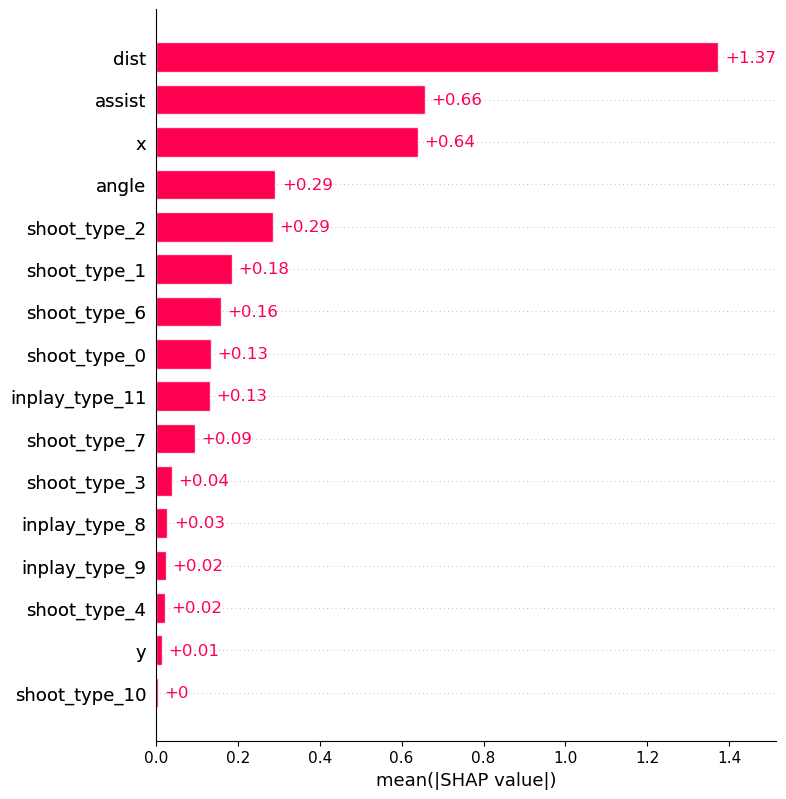

In [19]:
shap.plots.bar(shap_values, max_display=20)

In [20]:
#y_pred = model.predict_proba(df[feature])

# np.argmax(y_pred[:,1])
# np.argmin(y_pred[:,1])

# df.iloc[[161560, 32282],:]

# shap.plots.waterfall(shap_values[161560])

# 모델을 이용하여 나의 xg값을 구해보자

In [35]:
import multiprocessing as mp

In [ ]:
mp.Process()

In [33]:
_cls = FIFAOnline4Analysis()
xg_df = _cls.player_xgvalue_by_nickname(nickname='무냑종', limit=30, model_nm='lr')

2023-01-11 09:35:50,859 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=무냑종 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:50,859 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=무냑종 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:50,859 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=무냑종 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:50,859 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=무냑종 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:50,859 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=무냑종 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:50,859 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=무냑종 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:50,859 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=무냑종 API 

2023-01-11 09:35:51,373 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63bd2272f92fc8392ca8e723 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,373 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63bd2272f92fc8392ca8e723 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,373 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63bd2272f92fc8392ca8e723 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,373 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63bd2272f92fc8392ca8e723 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,373 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63bd2272f92fc8392ca8e723 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,373 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63bd2272f92fc8392ca8e723 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,37

2023-01-11 09:35:51,977 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b7ffa360ca113ce8ff6024 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,977 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b7ffa360ca113ce8ff6024 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,977 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b7ffa360ca113ce8ff6024 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,977 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b7ffa360ca113ce8ff6024 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,977 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b7ffa360ca113ce8ff6024 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,977 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b7ffa360ca113ce8ff6024 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:51,97

2023-01-11 09:35:52,466 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b67d77fa3162ddca859afe API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:52,466 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b67d77fa3162ddca859afe API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:52,466 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b67d77fa3162ddca859afe API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:52,570 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b67ac5aa2d53c9cbd8cdcd API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:52,570 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b67ac5aa2d53c9cbd8cdcd API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:52,570 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b67ac5aa2d53c9cbd8cdcd API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:52,57

2023-01-11 09:35:53,009 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3e85af87c78e03d55d6b0 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,009 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3e85af87c78e03d55d6b0 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,009 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3e85af87c78e03d55d6b0 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,009 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3e85af87c78e03d55d6b0 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,009 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3e85af87c78e03d55d6b0 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,009 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3e85af87c78e03d55d6b0 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,00

2023-01-11 09:35:53,609 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3b1d468c0802000fbc29d API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,609 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3b1d468c0802000fbc29d API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,609 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3b1d468c0802000fbc29d API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,609 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3b1d468c0802000fbc29d API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,609 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3b1d468c0802000fbc29d API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,609 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b3b1d468c0802000fbc29d API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,60

2023-01-11 09:35:53,959 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63ad2f5a5f0bb749ff7fa52a API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,959 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63ad2f5a5f0bb749ff7fa52a API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,959 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63ad2f5a5f0bb749ff7fa52a API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:53,959 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63ad2f5a5f0bb749ff7fa52a API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,049 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63ad2a62fb5ed214df0a6377 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,049 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63ad2a62fb5ed214df0a6377 API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,04

2023-01-11 09:35:54,472 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a7d92420299ad1c331bfca API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,472 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a7d92420299ad1c331bfca API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,472 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a7d92420299ad1c331bfca API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,472 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a7d92420299ad1c331bfca API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,472 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a7d92420299ad1c331bfca API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,472 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a7d92420299ad1c331bfca API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,47

2023-01-11 09:35:54,969 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a2ad6cee091287093c7c3c API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,969 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a2ad6cee091287093c7c3c API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,969 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a2ad6cee091287093c7c3c API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,969 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a2ad6cee091287093c7c3c API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,969 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a2ad6cee091287093c7c3c API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,969 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63a2ad6cee091287093c7c3c API SUCCESS >> file::FIFAOnline4.py - line::45
2023-01-11 09:35:54,96

2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493
2023-01-11 09:35:56,274 - logger - INFO - matchId - 30 >> file::FIFAOnline4.py - line::493

       goalTime         x         y  type  result       spId  spGrade  \
0         709.0  0.911868  0.572031     2       0  260211567        5   
1        1465.0  0.945005  0.568314     1       1  272190043        3   
2        2343.0  0.820320  0.611753     1       0  268138449        3   
3        1681.0  0.833200  0.558094     1       0  265181458        5   
4        1736.0  0.796949  0.528848     1       0  256227535        5   
..          ...       ...       ...   ...     ...        ...      ...   
307      1188.0  0.899569  0.374459     1       0  220158023        5   
308      1304.0  0.929956  0.443751     3       0  237028130        5   
309      2066.0  0.943648  0.360093     1       0  246189332        5   
310  16778726.0  0.833338  0.539877     2       1  220158023        5   
311  16777604.0  0.821786  0.548000     2       1  220158023        5   

     spLevel spIdType  assist  ...  inplay_type_9  inplay_type_11  \
0          5     True       1  ...              0     

KeyError: 'spId'

In [24]:
spid_list = _api.get_metadata_spid()
spid_df = pd.DataFrame(spid_list)
spid_df.columns = ['spId', 'spNm']

seasonid_list = _api.get_metadata_seasonid()
seasonid_df = pd.DataFrame(seasonid_list)

spposition_list = _api.get_metadata_spposition()
spposition_df = pd.DataFrame(spposition_list)
spposition_df.rename(columns={'spposition':'spPosition'}, inplace=True)

2023-01-10 09:30:23,317 - logger - INFO - https://static.api.nexon.co.kr/fifaonline4/latest/spid.json API SUCCESS >> file::FifaOnline4.py - line::38
2023-01-10 09:30:23,403 - logger - INFO - https://static.api.nexon.co.kr/fifaonline4/latest/seasonid.json API SUCCESS >> file::FifaOnline4.py - line::38
2023-01-10 09:30:23,431 - logger - INFO - https://static.api.nexon.co.kr/fifaonline4/latest/spposition.json API SUCCESS >> file::FifaOnline4.py - line::38


In [26]:
'''
현질안하면못해
딱총새
유로파가는맨유
'''

'\n현질안하면못해\n딱총새\n유로파가는맨유\n'

In [67]:
nickname='무냑종'
userinfo = _api.get_user_info_by_nickname(nickname=nickname)
match_list = _api.get_user_match_by_accessid(accessid=userinfo['accessId'], matchtype=50, offset=0, limit=30)

json_data = []
for matchid in match_list:
    match_detail = _api.get_match_detail_by_matchid(matchid=matchid)

    if match_detail == {}:
        pass
    else :
        json_data.append(match_detail)

2023-01-10 14:06:45,552 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users?nickname=무냑종 API SUCCESS >> file::FifaOnline4.py - line::38
2023-01-10 14:06:45,946 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/users/90e32f7237734b5cf164250b/matches?matchtype=50&offset=0&limit=30 API SUCCESS >> file::FifaOnline4.py - line::38
2023-01-10 14:06:46,046 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b90583d6a9e2bded7b21e5 API SUCCESS >> file::FifaOnline4.py - line::38
2023-01-10 14:06:46,141 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b903113f875b25675faf3c API SUCCESS >> file::FifaOnline4.py - line::38
2023-01-10 14:06:46,267 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b9003c78a47d988d197f7e API SUCCESS >> file::FifaOnline4.py - line::38
2023-01-10 14:06:46,391 - logger - INFO - https://api.nexon.co.kr/fifaonline4/v1.0/matches/63b7ffa360ca113ce8ff6024 API SUCCESS >> file::FifaOnline4.py - line::38

In [68]:
shootdetail_tmp_df, matchdetail_tmp_df, shoot_tmp_df, pass_tmp_df, defence_tmp_df, player_tmp_df = _cls.preprocessing_df(json_data)

rows - 314
matchId - 30
accessId - 27
matchDate - min 2022-12-20T14:44:41, max : 2023-01-07T14:49:52


In [30]:
tmp_data

NameError: name 'tmp_data' is not defined

In [69]:
tmp_data = feature_engineering(shootdetail_tmp_df)

In [70]:
tmp_data['goalid'] = range(tmp_data.shape[0])
tmp_data['seasonId'] = tmp_data['spId'].apply(lambda x: int(str(x)[:3]))

tmp_data = pd.merge(tmp_data, player_tmp_df, on=['matchId', 'matchDate', 'matchType', 'accessId', 'nickname', 'spId'], suffixes=('','_player'))
tmp_data = pd.merge(tmp_data, seasonid_df, on =['seasonId'], how='left')
tmp_data = pd.merge(tmp_data, spposition_df, on =['spPosition'], how='left')
tmp_data = pd.merge(tmp_data, spid_df, on=['spId'], how='left')

In [71]:
total_data = copy.deepcopy(data)

In [72]:
total_data['goalid'] = range(total_data.shape[0])
total_data['seasonId'] = total_data['spId'].apply(lambda x: int(str(x)[:3]))

total_data = pd.merge(total_data, player_df, on=['matchId', 'matchDate', 'matchType', 'accessId', 'nickname', 'spId'], suffixes=('','_player'))
total_data = pd.merge(total_data, seasonid_df, on =['seasonId'], how='left')
total_data = pd.merge(total_data, spposition_df, on =['spPosition'], how='left')
total_data = pd.merge(total_data, spid_df, on=['spId'], how='left')

In [73]:
model_nm = 'lr'
model = joblib.load(f'../rsc/model/{model_nm}_model_v1.pkl') 

y_pred = model.predict_proba(tmp_data[feature])
tmp_data['xg'] = y_pred[:,1]

y_pred = model.predict_proba(total_data[feature])
total_data['xg'] = y_pred[:,1]

In [74]:
# 특정 유저의 선수별 xg 
xg_by_spid_df = tmp_data.groupby(['accessId', 'spId', 'spNm', 'className', 'desc', 'spGrade']).agg({'xg' : 'sum', 'result' : 'sum', 'goalid' : 'count'}).reset_index()

xg_by_spid_df['xgdiff'] = xg_by_spid_df['result'] - xg_by_spid_df['xg']
xg_by_spid_df['xgdiff_by_cnt'] = xg_by_spid_df['xgdiff'] / xg_by_spid_df['goalid']
my_xg_by_spid_df = xg_by_spid_df[xg_by_spid_df['accessId'] == userinfo['accessId']]

In [75]:
total_xg_by_spid_df = total_data.groupby(['spId', 'spNm', 'className', 'desc', 'spGrade']).agg({'xg' : 'sum', 'result' : 'sum', 'goalid' : 'count'}).reset_index()

total_xg_by_spid_df['xgdiff'] = total_xg_by_spid_df['result'] - total_xg_by_spid_df['xg']
total_xg_by_spid_df['xgdiff_by_cnt'] = total_xg_by_spid_df['xgdiff'] / total_xg_by_spid_df['goalid']

In [76]:
my_xg_by_spid_df[my_xg_by_spid_df['goalid'] >= 5].sort_values('xgdiff_by_cnt', ascending=False).head()

,accessId,spId,spNm,className,desc,spGrade,xg,result,goalid,xgdiff,xgdiff_by_cnt
57,90e32f7237734b5cf164250b,237037576,호나우두,MC (Multi-League Champions),CF,5,4.808177,10,17,5.191823,0.305401
51,90e32f7237734b5cf164250b,237001040,호베르투 카를루스,MC (Multi-League Champions),LWB,5,1.045407,2,5,0.954593,0.190919
58,90e32f7237734b5cf164250b,237037576,호나우두,MC (Multi-League Champions),LS,5,5.188539,7,17,1.811461,0.106557
65,90e32f7237734b5cf164250b,267233927,루카스 파케타,22 TOTS (22 Team Of The Season),LCM,3,3.208826,4,10,0.791174,0.079117
67,90e32f7237734b5cf164250b,272190043,펠레,BWC (Best of World Cup),CAM,3,5.671023,7,17,1.328977,0.078175


In [77]:
rslt_df = pd.merge(my_xg_by_spid_df, total_xg_by_spid_df, on=['spId', 'spNm', 'className', 'desc', 'spGrade'], how='left', suffixes=('','_total'))

In [80]:
rslt_df2 = rslt_df[['spNm', 'className', 'desc', 'spGrade', 'goalid','xg', 'result', 'xgdiff_by_cnt', 'xgdiff_total', 'xgdiff_by_cnt_total']].sort_values('xgdiff_by_cnt',ascending=False)

(array([2.100e+01, 3.250e+02, 1.942e+03, 2.294e+03, 5.230e+02, 1.020e+02,
        1.700e+01, 1.000e+00, 2.000e+00, 2.000e+00]),
 array([-0.39109754, -0.26659968, -0.14210183, -0.01760398,  0.10689388,
         0.23139173,  0.35588959,  0.48038744,  0.60488529,  0.72938315,
         0.853881  ]),
 <BarContainer object of 10 artists>)

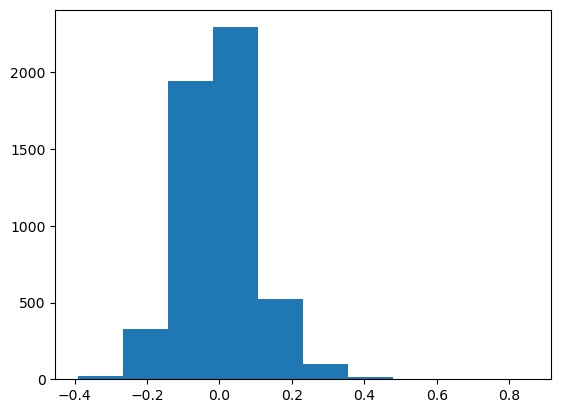

In [84]:
plt.hist(total_xg_by_spid_df[total_xg_by_spid_df['goalid'] >= 10]['xgdiff_by_cnt'])

In [81]:
rslt_df2[rslt_df2['goalid']>=5]

,spNm,className,desc,spGrade,goalid,xg,result,xgdiff_by_cnt,xgdiff_total,xgdiff_by_cnt_total
6,호나우두,MC (Multi-League Champions),CF,5,17,4.808177,10,0.305401,-4.609723,-0.026957
0,호베르투 카를루스,MC (Multi-League Champions),LWB,5,5,1.045407,2,0.190919,-0.424344,-0.006956
7,호나우두,MC (Multi-League Champions),LS,5,17,5.188539,7,0.106557,4.100180,0.013622
14,루카스 파케타,22 TOTS (22 Team Of The Season),LCM,3,10,3.208826,4,0.079117,-0.106706,-0.053353
16,펠레,BWC (Best of World Cup),CAM,3,17,5.671023,7,0.078175,2.215412,0.014769
5,크리스티아누 호날두,MC (Multi-League Champions),LF,5,36,13.189584,15,0.050289,6.542387,0.068867
19,세징야,22KLB (22 K-League Best),RS,5,18,4.820330,5,0.009982,1.000675,0.200135
18,세징야,22KLB (22 K-League Best),RF,5,9,2.278020,2,-0.030891,-0.761067,-0.126844
4,파벨 네드베드,MC (Multi-League Champions),RF,5,15,5.704460,5,-0.046964,1.652619,0.086980
8,호나우두,MC (Multi-League Champions),ST,5,5,2.239235,2,-0.047847,-2.262552,-0.000848


In [78]:
rslt_df.sort_values('xgdiff', ascending=False)

,accessId,spId,spNm,className,desc,spGrade,xg,result,goalid,xgdiff,xgdiff_by_cnt,xg_total,result_total,goalid_total,xgdiff_total,xgdiff_by_cnt_total
6,90e32f7237734b5cf164250b,237037576,호나우두,MC (Multi-League Champions),CF,5,4.808177,10,17,5.191823,0.305401,50.609723,46.0,171.0,-4.609723,-0.026957
7,90e32f7237734b5cf164250b,237037576,호나우두,MC (Multi-League Champions),LS,5,5.188539,7,17,1.811461,0.106557,84.899820,89.0,301.0,4.100180,0.013622
5,90e32f7237734b5cf164250b,237020801,크리스티아누 호날두,MC (Multi-League Champions),LF,5,13.189584,15,36,1.810416,0.050289,18.457613,25.0,95.0,6.542387,0.068867
16,90e32f7237734b5cf164250b,272190043,펠레,BWC (Best of World Cup),CAM,3,5.671023,7,17,1.328977,0.078175,38.784588,41.0,150.0,2.215412,0.014769
0,90e32f7237734b5cf164250b,237001040,호베르투 카를루스,MC (Multi-League Champions),LWB,5,1.045407,2,5,0.954593,0.190919,8.424344,8.0,61.0,-0.424344,-0.006956
9,90e32f7237734b5cf164250b,237045674,마이클 에시앙,MC (Multi-League Champions),SW,5,0.094674,1,1,0.905326,0.905326,0.915477,1.0,7.0,0.084523,0.012075
2,90e32f7237734b5cf164250b,237005003,카푸,MC (Multi-League Champions),RB,5,0.097973,1,1,0.902027,0.902027,0.519260,0.0,3.0,-0.519260,-0.173087
14,90e32f7237734b5cf164250b,267233927,루카스 파케타,22 TOTS (22 Team Of The Season),LCM,3,3.208826,4,10,0.791174,0.079117,0.106706,0.0,2.0,-0.106706,-0.053353
19,90e32f7237734b5cf164250b,277225733,세징야,22KLB (22 K-League Best),RS,5,4.820330,5,18,0.179670,0.009982,0.999325,2.0,5.0,1.000675,0.200135
10,90e32f7237734b5cf164250b,237164240,티아구 실바,MC (Multi-League Champions),RCB,5,0.848999,1,4,0.151001,0.037750,3.422698,3.0,19.0,-0.422698,-0.022247


In [ ]:
# # prepare models
# models = []
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('XGB', XGBClassifier()))
# # models.append(('SVM', SVC(gamma='auto', probability=True))) # 시간이 너무 오래 걸려 제외

# # evaluate each model in turn
# results = []
# names = []
# scoring = 'roc_auc'

# for name, model in models:
#     kfold = KFold(n_splits=10, random_state=42, shuffle=True)
#     cv_results = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
        
# # boxplot algorithm comparison
# fig = plt.figure(figsize=(11,6))
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()